# Daily Report

We replicate the numbers of cases published in the daily meeting

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib 



Using matplotlib backend: MacOSX


In [2]:

strpath = '../src/'
m = []
if not os.path.isfile('report_data.csv'):
    for filename in glob.glob(strpath+"*"):
        if filename.find('.csv')>0:
            date = filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
            df = pd.read_csv(filename, encoding = "ISO-8859-1",dtype =str)
            df['FECHA_ACTUALIZACION1'] = pd.to_datetime(df['FECHA_ACTUALIZACION'],)
            df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
            df.FECHA_SINTOMAS = pd.to_datetime(df['FECHA_SINTOMAS'],)
            df['deltaSintomas']=df.FECHA_ACTUALIZACION1-df.FECHA_SINTOMAS 
            df['deltaSintomas'] = df.deltaSintomas.dt.days
            df.loc[df.FECHA_DEF=='9999-99-99', 'FECHA_DEF'] = '2050-12-31'
            df.FECHA_DEF = pd.to_datetime(df['FECHA_DEF'],)
            m.append([df.FECHA_ACTUALIZACION.unique()[0]
                      ,df[(df.deltaSintomas<14)& (df.RESULTADO=='1')]['ID_REGISTRO'].count()
                  ,df[df.RESULTADO=='1']['ID_REGISTRO'].count()
                  ,df[(df.FECHA_DEF!='2050-12-31')&(df.RESULTADO=='1')]['ID_REGISTRO'].count()
                  ,df[df.RESULTADO=='3']['ID_REGISTRO'].count()
                  ,df.ID_REGISTRO.nunique()
                  ,len(df[(df.deltaSintomas<14)& (df.RESULTADO=='3')])
                  ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='3')])
                  ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='2')])
                     ]
            )
    df = pd.DataFrame(m)
    df.columns = ['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra', 'activos sospechosos', 'defunciones sospechosos', 'muertos negativos']
    df = df.sort_values(by='date', ascending=False)
    df = df.reset_index(drop=True)
    df.to_csv('report_data.csv', index=False)
else:
    df = pd.read_csv('report_data.csv')
    

In [3]:
column = df.columns[1:]
for each in column:
    column_name = '∆ '+ each
    df[column_name] = df[each] - df[each].shift(-1)
    column_name1 = '% '+ each
    df[column_name1] = (df[column_name]/ df[column_name].shift(-1))*100

In [4]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')

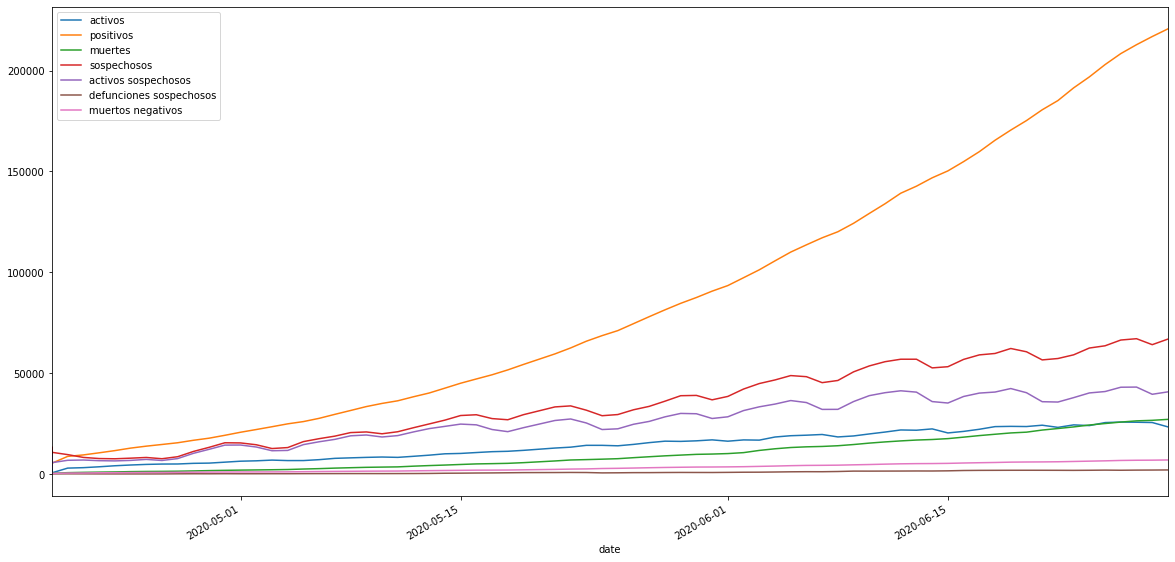

In [5]:
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

In [6]:
df

,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos,∆ activos,...,∆ sospechosos,% sospechosos,∆ muestra,% muestra,∆ activos sospechosos,% activos sospechosos,∆ defunciones sospechosos,% defunciones sospechosos,∆ muertos negativos,% muertos negativos
0,2020-06-29,23389,220657,27121,66910,566602,40759,2055,7000,-2169.0,...,2767.0,-93.606225,10404.0,202.176448,1207.0,-33.790594,51.0,159.375000,96.0,213.333333
1,2020-06-28,25558,216852,26648,64143,556198,39552,2004,6904,-142.0,...,-2956.0,-448.558422,5146.0,57.613077,-3572.0,-4638.961039,32.0,46.376812,45.0,46.391753
2,2020-06-27,25700,212802,26381,67099,551052,43124,1972,6859,-86.0,...,659.0,23.066153,8932.0,66.315242,77.0,3.609939,69.0,-109.523810,97.0,50.520833
3,2020-06-26,25786,208392,25779,66440,542120,43047,1903,6762,257.0,...,2857.0,257.851986,13469.0,103.663511,2133.0,306.906475,-63.0,-87.500000,192.0,121.518987
4,2020-06-25,25529,202951,25060,63583,528651,40914,1966,6570,1493.0,...,1108.0,32.888097,12993.0,94.240952,695.0,29.892473,72.0,156.521739,158.0,103.947368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2020-04-19,627,5399,406,10792,41593,5664,90,359,-1150.0,...,-2572.0,-258.492462,-6772.0,844.389027,-3840.0,-899.297424,-63.0,-210.000000,-75.0,170.454545
74,2020-04-19,1777,6875,546,13364,48365,9504,153,434,-496.0,...,995.0,152.607362,-802.0,-16.952019,427.0,19.605142,30.0,96.774194,-44.0,-53.658537
75,2020-04-19,2273,7497,650,12369,49167,9077,123,478,1355.0,...,652.0,41.318124,4731.0,-92.150370,2178.0,-555.612245,31.0,-155.000000,82.0,-87.234043
76,2020-04-19,918,5847,449,11717,44436,6899,92,396,-2037.0,...,1578.0,NaN,-5134.0,NaN,-392.0,NaN,-20.0,NaN,-94.0,NaN


In [7]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[0]['activos'], df.loc[0]['∆ activos'],df.loc[0]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[0]['positivos'], df.loc[0]['∆ positivos'],df.loc[0]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[0]['muertes'], df.loc[0]['∆ muertes'],df.loc[0]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[0]['sospechosos'], df.loc[0]['∆ sospechosos'],df.loc[0]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[0]['activos sospechosos'], df.loc[0]['∆ activos sospechosos'],df.loc[0]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[0]['defunciones sospechosos'], df.loc[0]['∆ defunciones sospechosos'],df.loc[0]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[0]['muertos negativos'], df.loc[0]['∆ muertos negativos'],df.loc[0]['% muertos negativos'],) )


Activos 23389. ∆ -2169. % 1527.46
Positivos 220657. ∆ 3805. % 93.95
Muertes 27121. ∆ 473. % 177.15
Sospechosos 66910. ∆ 2767. % -93.61
---Sospechosos---
Activos 40759. ∆ 1207. % -33.79
Defunciones 2055. ∆ 51. % 159.38

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 7000. ∆ 96. % 213.33


In [8]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[1]['activos'], df.loc[1]['∆ activos'],df.loc[1]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[1]['positivos'], df.loc[1]['∆ positivos'],df.loc[1]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[1]['muertes'], df.loc[1]['∆ muertes'],df.loc[1]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[1]['sospechosos'], df.loc[1]['∆ sospechosos'],df.loc[1]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[1]['activos sospechosos'], df.loc[1]['∆ activos sospechosos'],df.loc[1]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[1]['defunciones sospechosos'], df.loc[1]['∆ defunciones sospechosos'],df.loc[1]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[1]['muertos negativos'], df.loc[1]['∆ muertos negativos'],df.loc[1]['% muertos negativos'],) )


Activos 25558. ∆ -142. % 165.12
Positivos 216852. ∆ 4050. % 91.84
Muertes 26648. ∆ 267. % 44.35
Sospechosos 64143. ∆ -2956. % -448.56
---Sospechosos---
Activos 39552. ∆ -3572. % -4638.96
Defunciones 2004. ∆ 32. % 46.38

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 6904. ∆ 45. % 46.39


In [9]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[2]['activos'], df.loc[2]['∆ activos'],df.loc[2]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[2]['positivos'], df.loc[2]['∆ positivos'],df.loc[2]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[2]['muertes'], df.loc[2]['∆ muertes'],df.loc[2]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[2]['sospechosos'], df.loc[2]['∆ sospechosos'],df.loc[2]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[2]['activos sospechosos'], df.loc[2]['∆ activos sospechosos'],df.loc[2]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[2]['defunciones sospechosos'], df.loc[2]['∆ defunciones sospechosos'],df.loc[2]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[2]['muertos negativos'], df.loc[2]['∆ muertos negativos'],df.loc[2]['% muertos negativos'],) )


Activos 25700. ∆ -86. % -33.46
Positivos 212802. ∆ 4410. % 81.05
Muertes 26381. ∆ 602. % 83.73
Sospechosos 67099. ∆ 659. % 23.07
---Sospechosos---
Activos 43124. ∆ 77. % 3.61
Defunciones 1972. ∆ 69. % -109.52

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 6859. ∆ 97. % 50.52
